In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [5]:
X_train = df_train.drop(columns=['label']).values
y_train = df_train['label'].values

X_test = df_test.drop(columns=['label']).values
y_test = df_test['label'].values

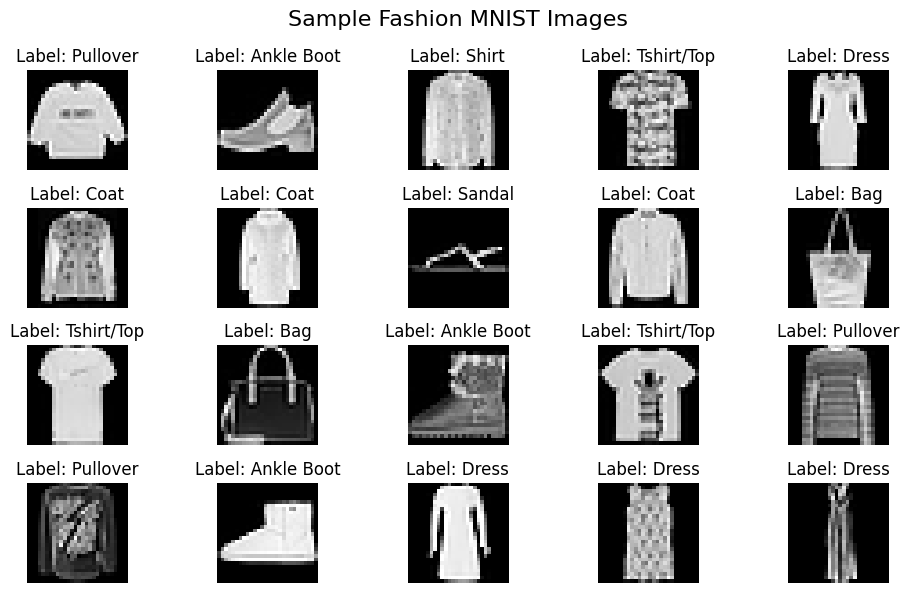

In [16]:
class_labels = ['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure(figsize=(10,6))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='grey')
    plt.title(f"Label: {class_labels[y_train[i]]}")
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_7220/3650027800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='cubehelix')


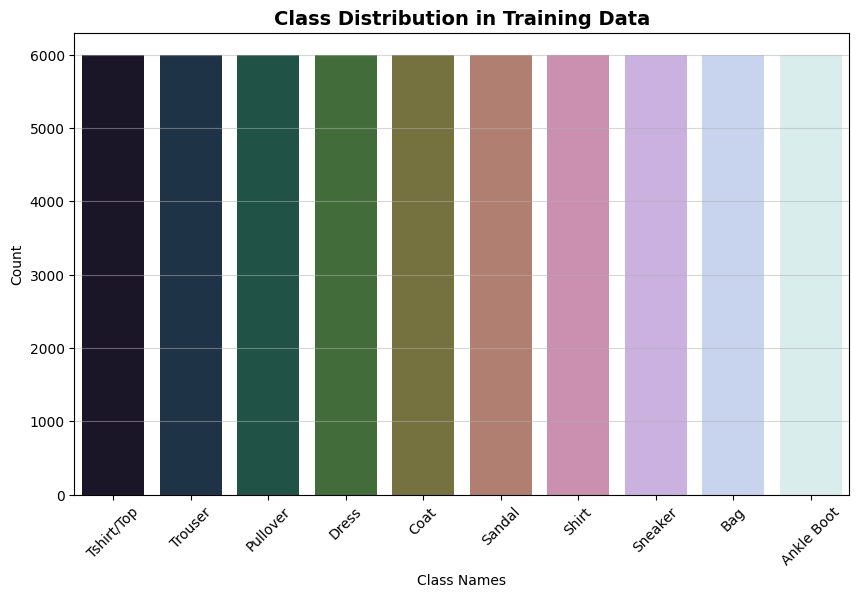

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x=y_train, palette='cubehelix')
plt.xticks(ticks=range(10), rotation=45, labels=class_labels)
plt.title("Class Distribution in Training Data", fontsize=14, weight='bold')
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [19]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), ))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-03 13:35:37.239754: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10


2025-05-03 13:36:18.213425: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 263424000 exceeds 10% of free system memory.


  7/657 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.1404 - loss: 31.4778

2025-05-03 13:36:19.650810: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2025-05-03 13:36:19.651216: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2025-05-03 13:36:19.690504: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2025-05-03 13:36:19.690555: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.


657/657 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.7238 - loss: 2.5518 - val_accuracy: 0.8592 - val_loss: 0.3925
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8690 - loss: 0.3550 - val_accuracy: 0.8577 - val_loss: 0.3848
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.8878 - loss: 0.3006 - val_accuracy: 0.8700 - val_loss: 0.3500
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8999 - loss: 0.2662 - val_accuracy: 0.8813 - val_loss: 0.3360
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.9088 - loss: 0.2427 - val_accuracy: 0.8848 - val_loss: 0.3279
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9190 - loss: 0.2157 - val_accuracy: 0.8903 - val_loss: 0.3171
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.9249 - loss: 0.1974 - val_accuracy: 0.8846 - val_loss: 0.3307
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9292 - loss: 0.1873 - val_accurac

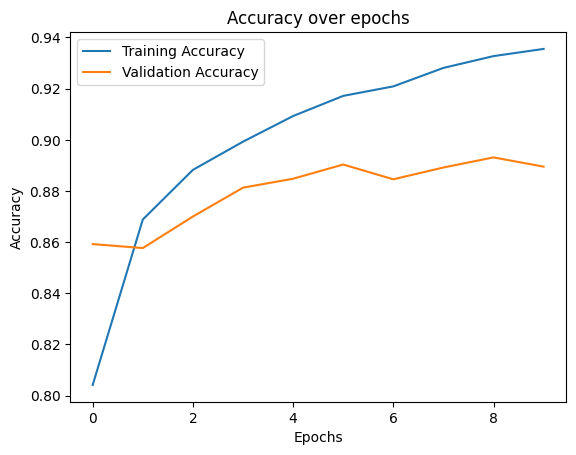

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Accuracy of the model: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8952 - loss: 0.3550
Accuracy of the model: 89.69%


 36/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


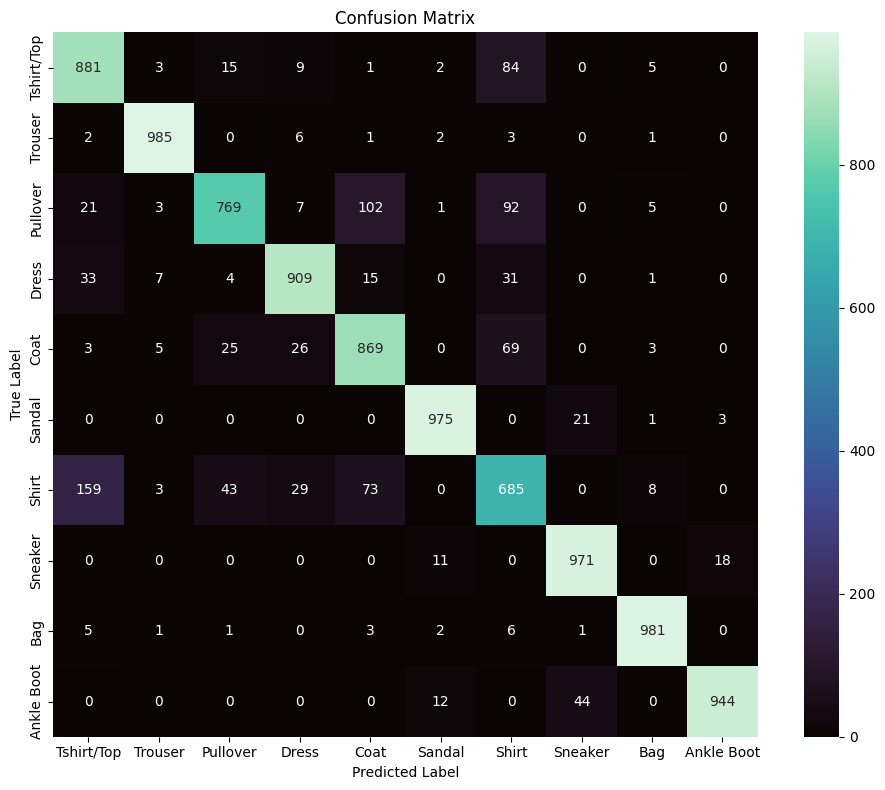

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, square=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='mako')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

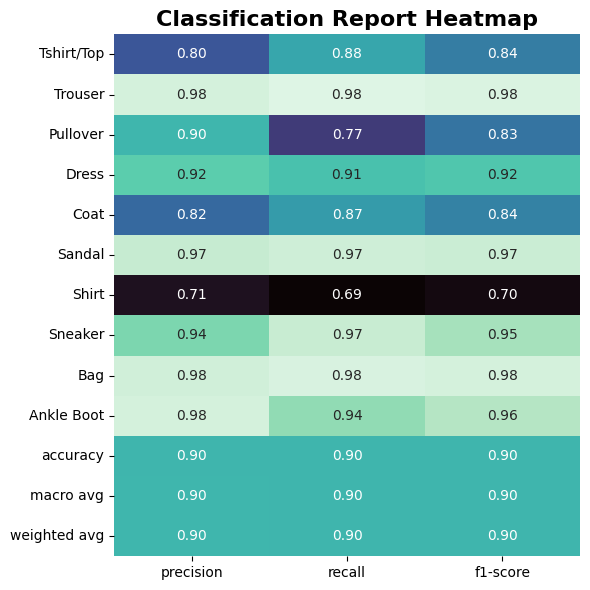

In [38]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(6, 6))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap="mako", cbar=False, fmt=".2f")
plt.title("Classification Report Heatmap", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

In [37]:
report_df.head()

,precision,recall,f1-score,support
Tshirt/Top,0.798007,0.881,0.837452,1000.0
Trouser,0.978153,0.985,0.981565,1000.0
Pullover,0.897316,0.769,0.828218,1000.0
Dress,0.921907,0.909,0.915408,1000.0
Coat,0.816729,0.869,0.842054,1000.0
